<h1> Se a realizado 3 modelos para ver el comportamiento en todos los casos</h1>
<h2>Diferencias</h2>
<h3> Modelo 1</h3>
<ul>
  <li> Img escala de grises </li>
  <li> Modelo secuencial para 1 Canal</li>
  <li>Img size: 150 - 150</li>
  <li> Img Total: </li>
    <ul>
      <li>Nano: 1792</li>
      <li>Uno: 1734</li>
    </ul>
  <li> Img Train</li>
    <ul>
      <li>Nano: 80% de Img Total - Nano</li>
      <li>Uno: 80% de Img Total - Uno</li>
    </ul>
  <li> Img Evaluate: </li>
    <ul>
      <li> Nano: 20% de Img Total - Nano</li>
      <li> Uno: 20% de Img Total - Uno</li>
    </ul>
  <li>Train on 2820 samples, validate on 706 samples</li>

</ul>
<h3> Modelo 2 </h3>
<ul>
  <li> Img a color</li>
  <li> Modelo secuencial para 3 Canales</li>
  <li>Img size: 200 - 200</li>
  <li> Img Total:</li>
    <ul>
      <li> Nano: 1792</li>
      <li> Uno: 1734</li>
    </ul>
  <li> Img Train</li>
    <ul>
      <li> Nano: 80% de Img Total - Nano</li>
      <li> Uno: 80% de Img Total - Uno</li>
    </ul>
  <li> Img Evaluate: </li>
    <ul>
      <li> Nano: 20% de Img Total - Nano</li>
      <li> Uno: 20% de Img Total - Uno</li>
    </ul>
  <li>Train on 2820 samples, validate on 706 samples</li>
</ul>

<h3> Modelo 3</h3>
<ul>
  <li>Img a color</li>
  <li>Uso del ImageDataGenerator</li>
  <li>Diferente Modelo secuencial</li>
  <li>Img size: 150 - 150</li>
  <li>Img Train: </li>
    <ul>
      <li>Nano: 1792</li>
      <li>Uno: 1734</li>
    </ul>
  <li>Img Evaluate: </li>
    <ul>
      <li>Nano: 236</li>
      <li>Uno: 229</li>
    </ul>
</ul>    

# MODELO 1

## **¡Cargar Imagenes!**

In [3]:
from keras.preprocessing import image
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\d

In [29]:
nano, uno = [], []
y_nano, y_uno = [], []
img_size=200

In [47]:
uno_folder_path='C:/Users/USUARIO/Desktop/Copia/Escritorio/TrAbAjOs/12/Informatica/Proyecto/train/uno'
uno=[]

print("Cargando...")
for img in os.listdir(uno_folder_path):
    img = cv2.imread(os.path.join(uno_folder_path,img))
    img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img= cv2.resize(img,(img_size,img_size))
    img = image.img_to_array(img)
    uno.append(img)
print ("Carga completa")

Cargando...
Carga completa


In [48]:
nano_folder_path='C:/Users/USUARIO/Desktop/Copia/Escritorio/TrAbAjOs/12/Informatica/Proyecto/train/nano'
nano=[]

print("Cargando...")
for img in os.listdir(nano_folder_path):
    img = cv2.imread(os.path.join(nano_folder_path,img))
    img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img= cv2.resize(img,(img_size,img_size))
    img = image.img_to_array(img)
    nano.append(img)
    
print ("Carga completa")

Cargando...
Carga completa


In [49]:
print ('Longitud del array de Nano: {}\nLongitud de array de Uno: {}'
      .format(len(nano), len(uno)))

Longitud del array de Nano: 1792
Longitud de array de Uno: 1734


## Se define las clases

In [50]:
classes = ['nano', 'uno']

## Se imprimen imagenes de muestras

In [51]:
import random 
#from keras.preprocessing import image

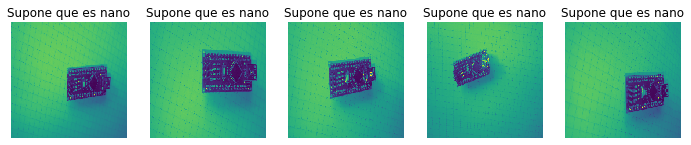

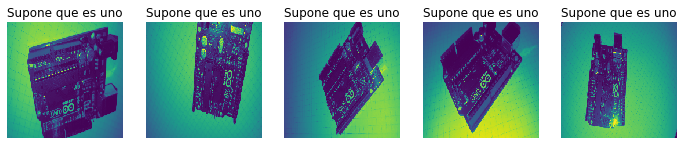

In [52]:
# de nano

plt.figure(figsize  = (12, 8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(nano))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Supone que es {}'.format(classes[0]))
plt.show()

#de uno
plt.figure(figsize  = (12, 8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(uno))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Supone que es {}'.format(classes[1]))
plt.show()


In [37]:
y_nano = [1 for item in enumerate(nano)]
y_uno = [0 for item in enumerate(uno)]


In [38]:
nano = np.asarray(nano).astype('float32')
uno = np.asarray(uno).astype('float32')
y_nano = np.asarray(y_nano).astype('float32')
y_uno = np.asarray(y_uno).astype('float32')
nano /= 255
uno /= 255

In [39]:
X = np.concatenate((nano, uno), axis = 0)
y = np.concatenate((y_nano, y_uno), axis = 0)

## Modelo para CNN

In [40]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import save_model, load_model

In [41]:
IMG_CHANNEL = 1
BATCH_SIZE = 128
N_EPOCH = 15
VERBOSE = 2
VALIDAION_SPLIT = .2
OPTIM = Adam()
N_CLASSES = len (classes)

In [42]:
y = np_utils.to_categorical(y, N_CLASSES)
print('One-Hot encoding listo')

One-Hot encoding listo


In [43]:
model = Sequential([
    Conv2D(32, (3, 3), padding = 'same', input_shape = (img_size, img_size, IMG_CHANNEL), activation = 'relu'),
    Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(.25),
    Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(.5),
    Dense(N_CLASSES, activation = 'softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 64)       

In [44]:
model.compile(loss = 'categorical_crossentropy', optimizer = OPTIM, metrics = ['accuracy'])

## Entrenar modelo

In [19]:
cnn_history2 = model.fit(X, y, batch_size = BATCH_SIZE, epochs = N_EPOCH, 
                         validation_split = VALIDAION_SPLIT, verbose = VERBOSE)


Train on 2820 samples, validate on 706 samples
Epoch 1/15
 - 536s - loss: 0.4239 - accuracy: 0.8667 - val_loss: 0.2174 - val_accuracy: 0.9646
Epoch 2/15
 - 493s - loss: 0.0542 - accuracy: 0.9929 - val_loss: 0.2464 - val_accuracy: 0.9674
Epoch 3/15
 - 494s - loss: 0.0243 - accuracy: 0.9947 - val_loss: 0.1614 - val_accuracy: 0.9759
Epoch 4/15
 - 494s - loss: 0.0214 - accuracy: 0.9961 - val_loss: 0.0347 - val_accuracy: 0.9887
Epoch 5/15
 - 471s - loss: 0.0169 - accuracy: 0.9961 - val_loss: 0.0527 - val_accuracy: 0.9873
Epoch 6/15
 - 446s - loss: 0.0218 - accuracy: 0.9968 - val_loss: 0.2307 - val_accuracy: 0.9249
Epoch 7/15
 - 445s - loss: 0.0131 - accuracy: 0.9975 - val_loss: 0.1418 - val_accuracy: 0.9504
Epoch 8/15
 - 447s - loss: 0.0077 - accuracy: 0.9982 - val_loss: 0.1854 - val_accuracy: 0.9221
Epoch 9/15
 - 464s - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.3724 - val_accuracy: 0.8952
Epoch 10/15
 - 446s - loss: 0.0066 - accuracy: 0.9989 - val_loss: 0.1472 - val_accuracy: 0.9448
E

## Evaluar el modelo

In [20]:
score = model.evaluate(X, y, verbose = 2)
print('ACCURACY DEL MODELO\n{}: {}%'.format(model.metrics_names[1], score[1]*100))

ACCURACY DEL MODELO
accuracy: 98.09982776641846%


## Guardar el Modelo

In [27]:
target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)

model.save('./modelo/modelo1_project.h5')
model.save_weights('./modelo/pesos1_project.h5')

## Grafica del modelo entrenado

In [53]:
acc = cnn_history2.history['accuracy']
val_acc = cnn_history2.history['val_accuracy']

loss = cnn_history2.history['loss']
val_loss = cnn_history2.history['val_loss']

epochs_range = range(N_EPOCH)

Text(0.5, 1.0, 'Training and Validation Accuracy')

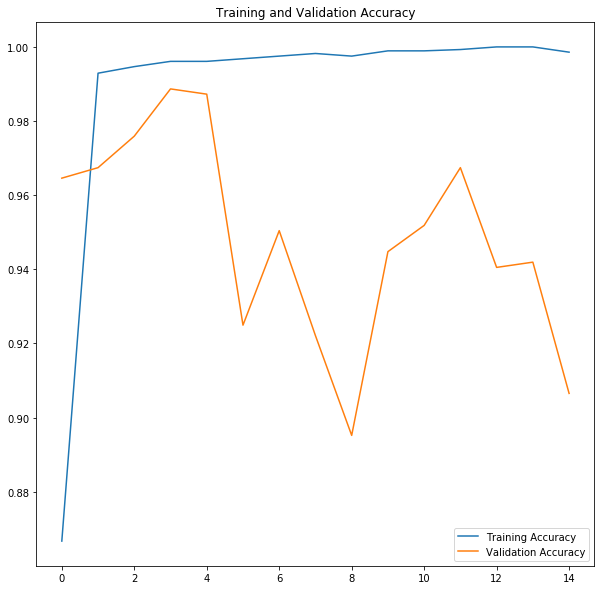

In [25]:
plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

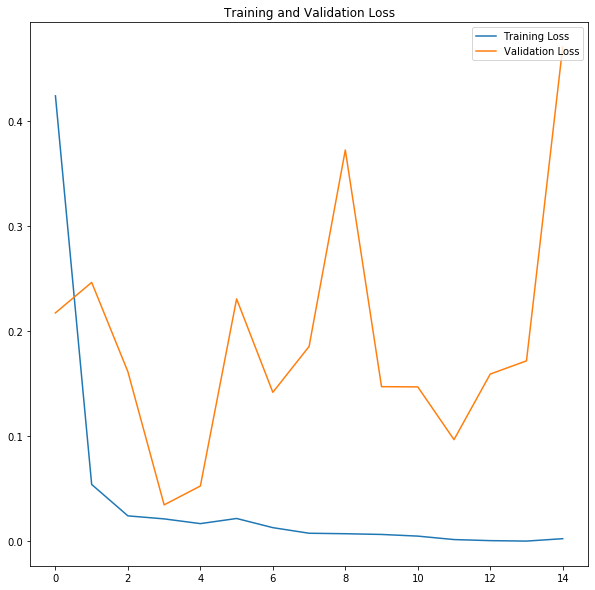

In [26]:
plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# MODELO 2

## ¡Cargar Imagenes!

In [4]:
from keras.preprocessing import image
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\d

In [ ]:
nano, uno = [], []
y_nano, y_uno = [], []
img_size=200

In [7]:
uno_folder_path='C:/Users/USUARIO/Desktop/Copia/Escritorio/TrAbAjOs/12/Informatica/Proyecto/train/uno'
uno=[]

print("Cargando...")
for img in os.listdir(uno_folder_path):
    img = cv2.imread(os.path.join(uno_folder_path,img))
    #img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img= cv2.resize(img,(img_size,img_size))
    img = image.img_to_array(img)
    uno.append(img)
print ("Carga completa")

Cargando...
Carga completa


In [8]:
nano_folder_path='C:/Users/USUARIO/Desktop/Copia/Escritorio/TrAbAjOs/12/Informatica/Proyecto/train/nano'
nano=[]

print("Cargando...")
for img in os.listdir(nano_folder_path):
    img = cv2.imread(os.path.join(nano_folder_path,img))
    #img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img= cv2.resize(img,(img_size,img_size))
    img = image.img_to_array(img)
    nano.append(img)
    
print ("Carga completa")

Cargando...
Carga completa


In [9]:
print ('Longitud del array de Nano: {}\nLongitud de array de Uno: {}'
      .format(len(nano), len(uno)))

Longitud del array de Nano: 1792
Longitud de array de Uno: 1734


## Se define las clases 

In [10]:
classes = ['nano', 'uno']

## **Se imprimen imagenes de muestras**

In [11]:
import random 

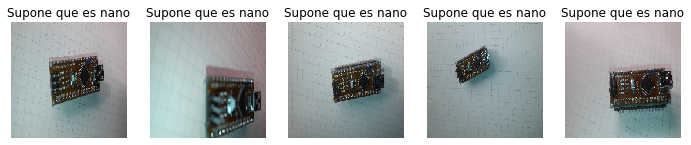

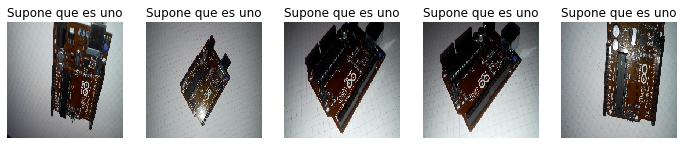

In [12]:
# de nano

plt.figure(figsize  = (12, 8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(nano))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Supone que es {}'.format(classes[0]))
plt.show()

#de uno
plt.figure(figsize  = (12, 8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(uno))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Supone que es {}'.format(classes[1]))
plt.show()

In [28]:
y_nano = [1 for item in enumerate(nano)]
y_uno = [0 for item in enumerate(uno)]
print(len(y_nano))
print(len(y_uno))

1792
1734


In [14]:
nano = np.asarray(nano).astype('float32')
uno = np.asarray(uno).astype('float32')
y_nano = np.asarray(y_nano).astype('float32')
y_uno = np.asarray(y_uno).astype('float32')
nano /= 255
uno /= 255

In [15]:
X = np.concatenate((nano, uno), axis = 0)
y = np.concatenate((y_nano, y_uno), axis = 0)

## Modelo para CNN

In [16]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import save_model, load_model

In [17]:
IMG_CHANNEL = 3
BATCH_SIZE = 128
N_EPOCH = 15
VERBOSE = 2
VALIDAION_SPLIT = .2
OPTIM = Adam()
N_CLASSES = len (classes)

In [18]:
y = np_utils.to_categorical(y, N_CLASSES)
print('One-Hot encoding listo')

One-Hot encoding listo


In [19]:
model = Sequential([
    Conv2D(32, (3, 3), padding = 'same', input_shape = (img_size, img_size, IMG_CHANNEL), activation = 'relu'),
    Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(.25),
    Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(.5),
    Dense(N_CLASSES, activation = 'softmax')
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)      

In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer = OPTIM, metrics = ['accuracy'])

## Entrenar modelo

In [21]:
cnn2_history = model.fit(X, y, batch_size = BATCH_SIZE, epochs = N_EPOCH, validation_split = VALIDAION_SPLIT, verbose = VERBOSE)


Train on 2820 samples, validate on 706 samples
Epoch 1/15
 - 1066s - loss: 2.2726 - accuracy: 0.7252 - val_loss: 0.1431 - val_accuracy: 0.9518
Epoch 2/15
 - 1273s - loss: 0.0509 - accuracy: 0.9901 - val_loss: 0.0962 - val_accuracy: 0.9844
Epoch 3/15
 - 2707s - loss: 0.0284 - accuracy: 0.9972 - val_loss: 0.0838 - val_accuracy: 0.9844
Epoch 4/15
 - 2000s - loss: 0.0193 - accuracy: 0.9972 - val_loss: 0.0577 - val_accuracy: 0.9873
Epoch 5/15
 - 989s - loss: 0.0192 - accuracy: 0.9968 - val_loss: 0.0335 - val_accuracy: 0.9873
Epoch 6/15
 - 1045s - loss: 0.0130 - accuracy: 0.9975 - val_loss: 0.0522 - val_accuracy: 0.9830
Epoch 7/15
 - 1336s - loss: 0.0139 - accuracy: 0.9972 - val_loss: 0.0391 - val_accuracy: 0.9802
Epoch 8/15
 - 1965s - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0592 - val_accuracy: 0.9688
Epoch 9/15
 - 1294s - loss: 0.0092 - accuracy: 0.9979 - val_loss: 0.0779 - val_accuracy: 0.9674
Epoch 10/15
 - 1056s - loss: 0.0071 - accuracy: 0.9982 - val_loss: 0.1202 - val_accuracy:

## Evaluar el modelo

In [22]:
score = model.evaluate(X, y, verbose = 2)
print('ACCURACY DEL MODELO\n{}: {}%'.format(model.metrics_names[1], score[1]*100))

ACCURACY DEL MODELO
accuracy: 98.01474809646606%


## Guardar el modelo

In [23]:
target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)

model.save('./modelo/modelo2_project.h5')
model.save_weights('./modelo/pesos2_project.h5')

## Grafica del modelo entrenado

In [24]:
acc = cnn2_history.history['accuracy']
val_acc = cnn2_history.history['val_accuracy']

loss = cnn2_history.history['loss']
val_loss = cnn2_history.history['val_loss']

epochs_range = range(N_EPOCH)

Text(0.5, 1.0, 'Training and Validation Accuracy')

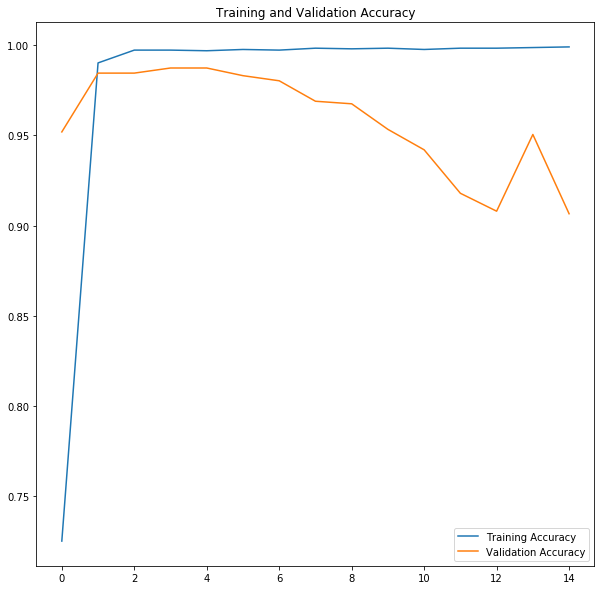

In [25]:
plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

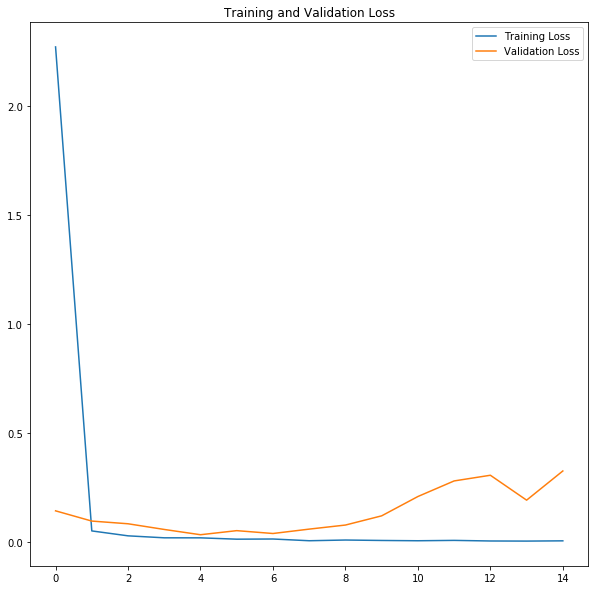

In [26]:
plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# MODELO 3

## Procesamiento de Imagenes

In [4]:
import sys
import os
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

## ImageDataGenerator 
**Sirve cuando no se tiene una base de datos extensa**

**Documentacion:**
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [1]:
path_train = './train'
path_test = './test'

longitud , altura  =  150 , 150
batch_size  =  32

## Funcion para Plot ImageDataGenerator
**Ref**
https://www.kaggle.com/hsinwenchang/keras-data-augmentation-visualize

In [2]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

## ImageDataGenerator para la imagenes de Train

In [5]:
entrenamiento_datagen = ImageDataGenerator(
    rescale=1. / 255, ##reescala 1-255 a 0-1
    shear_range=0.2, #gira img
    zoom_range=0.2, #zoom a img
    horizontal_flip=True) #invierte imagen

img_entranamiento = entrenamiento_datagen.flow_from_directory(
    path_train,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical') #nombre clases sub directorio


Found 3526 images belonging to 2 classes.


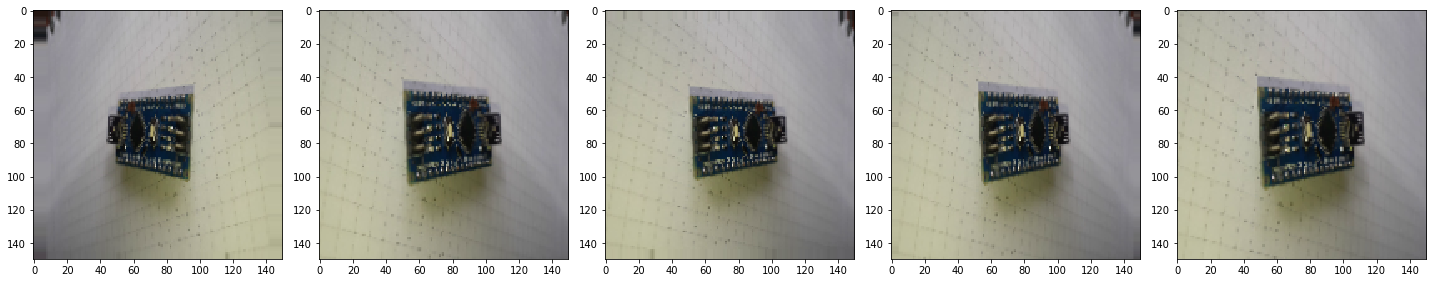

In [6]:
augmented_images = [img_entranamiento[0][0][0] for i in range(5)]
plotImages(augmented_images)

## ImageDataGenerator para la imagenes de Validacion

In [7]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

img_test = test_datagen.flow_from_directory(
    path_test,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

Found 465 images belonging to 2 classes.


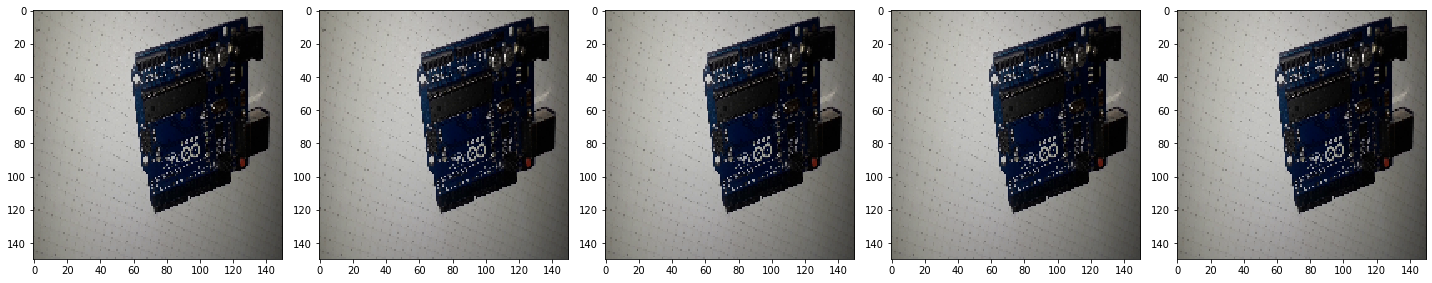

In [8]:
augmented_images = [img_test[10][0][0] for i in range(5)]
plotImages(augmented_images)

## MODELO PARA CNN 

In [9]:
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D

In [10]:
epocas = 15 ##numero de veces que va a iterar sobre las imagenes
batch_size  =  32 ##numero de imagenes a procesar en cada uno de los pasos
pasos  =  300  ##numero de veces que se va a procesar la informacion en las epocas
steps_validation =  100 ## luego de cada epoca se va a correr para ver que tan bien va el algoritmo
filtrosConv1  =  32 ##numero de filtro en cada convolucion profundidad de 32 al final
filtrosConv2  =  64 ##
tamano_filtro1  = (3, 3) ##tamaño del filtro de convolucion
tamano_filtro2  = (2, 2) ##tamaño del filtro del maxpooling
tamano_pool  = (2, 2)
clases  =  len(os.listdir(path_train))
lr  =  0.0004 #que tan grande van a ser los ajustes para la red neuronal

In [11]:
cnn = Sequential()
cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same"))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(clases, activation='softmax'))

cnn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               22429952  
____

In [12]:
cnn.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=lr), metrics=['accuracy'])

In [13]:
cnn_history    = cnn.fit_generator(img_entranamiento, steps_per_epoch=pasos, epochs=epocas, 
                  validation_data=img_test,
                  validation_steps=steps_validation)
print("Entrenamiento completado")

Epoch 1/20
300/300 [==============================] - 2956s 10s/step - loss: 0.1023 - acc: 0.9769 - val_loss: 0.1626 - val_acc: 0.9677
Epoch 2/20
300/300 [==============================] - 2188s 7s/step - loss: 0.0204 - acc: 0.9948 - val_loss: 0.1204 - val_acc: 0.9591
Epoch 3/20
300/300 [==============================] - 2210s 7s/step - loss: 0.0133 - acc: 0.9960 - val_loss: 0.1577 - val_acc: 0.9548
Epoch 4/20
300/300 [==============================] - 2202s 7s/step - loss: 0.0062 - acc: 0.9976 - val_loss: 0.1581 - val_acc: 0.9548
Epoch 5/20
300/300 [==============================] - 2151s 7s/step - loss: 0.0259 - acc: 0.9933 - val_loss: 0.1626 - val_acc: 0.9699
Epoch 6/20
300/300 [==============================] - 2140s 7s/step - loss: 0.0185 - acc: 0.9962 - val_loss: 0.1239 - val_acc: 0.9656
Epoch 7/20
300/300 [==============================] - 2172s 7s/step - loss: 0.0056 - acc: 0.9979 - val_loss: 0.0993 - val_acc: 0.9677
Epoch 8/20
300/300 [==============================] - 2178s 7

## Guardamos el modelo

In [14]:
target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)

cnn.save('./modelo/modelo3_project.h5')
cnn.save_weights('./modelo/pesos3_project.h5')

## Grafica de Accuracy y loss

In [18]:
acc = cnn_history.history['acc']
val_acc = cnn_history.history['val_acc']

loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

epochs_range = range(epocas)

Text(0.5, 1.0, 'Training and Validation Accuracy')

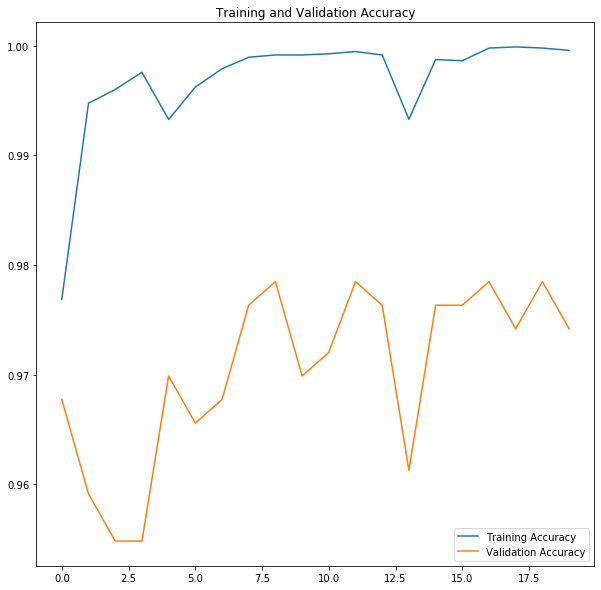

In [23]:
plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

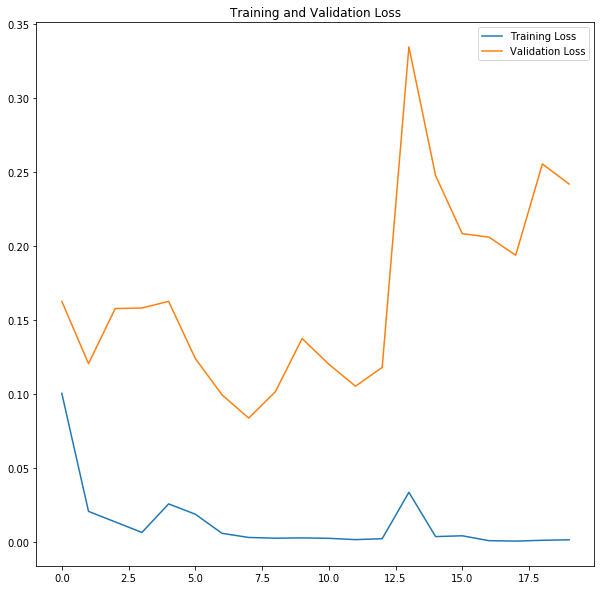

In [24]:
plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# MODELO 4

In [1]:
from keras.preprocessing import image
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\d

In [2]:
nano, uno = [], []
y_nano, y_uno = [], []
img_size=200

In [3]:
uno_folder_path='C:/Users/USUARIO/Desktop/Copia/Escritorio/TrAbAjOs/12/Informatica/Proyecto/train/uno'
uno=[]

print("Cargando...")
for img in os.listdir(uno_folder_path):
    img = cv2.imread(os.path.join(uno_folder_path,img))
    #img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img= cv2.resize(img,(img_size,img_size))
    img = image.img_to_array(img)
    uno.append(img)
print ("Carga completa")

Cargando...
Carga completa


In [4]:
nano_folder_path='C:/Users/USUARIO/Desktop/Copia/Escritorio/TrAbAjOs/12/Informatica/Proyecto/train/nano'
nano=[]

print("Cargando...")
for img in os.listdir(nano_folder_path):
    img = cv2.imread(os.path.join(nano_folder_path,img))
    #img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img= cv2.resize(img,(img_size,img_size))
    img = image.img_to_array(img)
    nano.append(img)
    
print ("Carga completa")

Cargando...
Carga completa


In [5]:
print ('Longitud del array de Nano: {}\nLongitud de array de Uno: {}'
      .format(len(nano), len(uno)))

Longitud del array de Nano: 2397
Longitud de array de Uno: 2050


In [6]:
classes = ['nano', 'uno']

In [7]:
import random

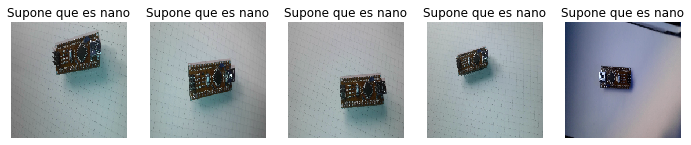

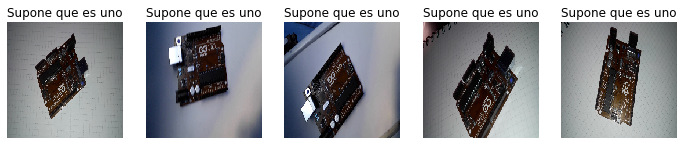

In [8]:
# de nano

plt.figure(figsize  = (12, 8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(nano))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Supone que es {}'.format(classes[0]))
plt.show()

#de uno
plt.figure(figsize  = (12, 8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(uno))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Supone que es {}'.format(classes[1]))
plt.show()

In [9]:
y_nano = [1 for item in enumerate(nano)]
y_uno = [0 for item in enumerate(uno)]
print(len(y_nano))
print(len(y_uno))

2397
2050


In [10]:
nano = np.asarray(nano).astype('float32')
uno = np.asarray(uno).astype('float32')
y_nano = np.asarray(y_nano).astype('float32')
y_uno = np.asarray(y_uno).astype('float32')
nano /= 255
uno /= 255

In [11]:
X = np.concatenate((nano, uno), axis = 0)
y = np.concatenate((y_nano, y_uno), axis = 0)

In [12]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import save_model, load_model

In [13]:
IMG_CHANNEL = 3
BATCH_SIZE = 128
N_EPOCH = 15
VERBOSE = 2
VALIDAION_SPLIT = .2
OPTIM = Adam()
N_CLASSES = len (classes)

In [14]:
y = np_utils.to_categorical(y, N_CLASSES)
print('One-Hot encoding listo')

One-Hot encoding listo


In [15]:
model = Sequential([
    Conv2D(32, (3, 3), padding = 'same', input_shape = (img_size, img_size, IMG_CHANNEL), activation = 'relu'),
    Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(.25),
    Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(.5),
    Dense(N_CLASSES, activation = 'softmax')
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)      

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = OPTIM, metrics = ['accuracy'])

In [17]:
cnn4_history = model.fit(X, y, batch_size = BATCH_SIZE, epochs = N_EPOCH, validation_split = VALIDAION_SPLIT, verbose = VERBOSE)


Train on 3557 samples, validate on 890 samples
Epoch 1/15
 - 3097s - loss: 1.7037 - accuracy: 0.7304 - val_loss: 0.6447 - val_accuracy: 0.6764
Epoch 2/15
 - 1978s - loss: 0.0339 - accuracy: 0.9930 - val_loss: 0.2412 - val_accuracy: 0.9202
Epoch 3/15
 - 1567s - loss: 0.0353 - accuracy: 0.9907 - val_loss: 0.0555 - val_accuracy: 0.9933
Epoch 4/15
 - 1332s - loss: 0.0139 - accuracy: 0.9972 - val_loss: 0.0257 - val_accuracy: 0.9944
Epoch 5/15
 - 1540s - loss: 0.0123 - accuracy: 0.9975 - val_loss: 0.1779 - val_accuracy: 0.9416
Epoch 6/15
 - 1366s - loss: 0.0141 - accuracy: 0.9966 - val_loss: 0.0918 - val_accuracy: 0.9719
Epoch 7/15
 - 1537s - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0401 - val_accuracy: 0.9944
Epoch 8/15
 - 1429s - loss: 0.0082 - accuracy: 0.9983 - val_loss: 0.0152 - val_accuracy: 0.9955
Epoch 9/15
 - 1421s - loss: 0.0096 - accuracy: 0.9975 - val_loss: 0.0593 - val_accuracy: 0.9933
Epoch 10/15
 - 1527s - loss: 0.0053 - accuracy: 0.9992 - val_loss: 0.0403 - val_accuracy

In [19]:
score = model.evaluate(X, y, verbose = 2)
print('ACCURACY DEL MODELO\n{}: {}%'.format(model.metrics_names[1], score[1]*100))

ACCURACY DEL MODELO
accuracy: 99.86507892608643%


In [18]:
target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)

model.save('./modelo/modelo4_project.h5')
model.save_weights('./modelo/pesos4_project.h5')

In [20]:
acc = cnn4_history.history['accuracy']
val_acc = cnn4_history.history['val_accuracy']

loss = cnn4_history.history['loss']
val_loss = cnn4_history.history['val_loss']

epochs_range = range(N_EPOCH)

Text(0.5, 1.0, 'Training and Validation Accuracy')

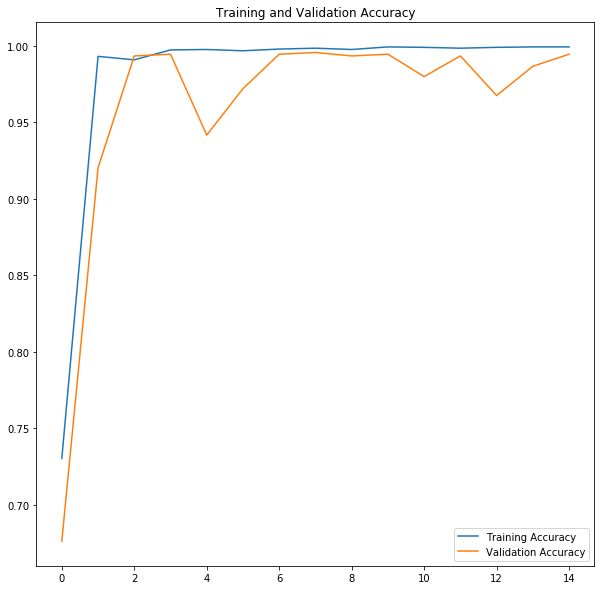

In [21]:
plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

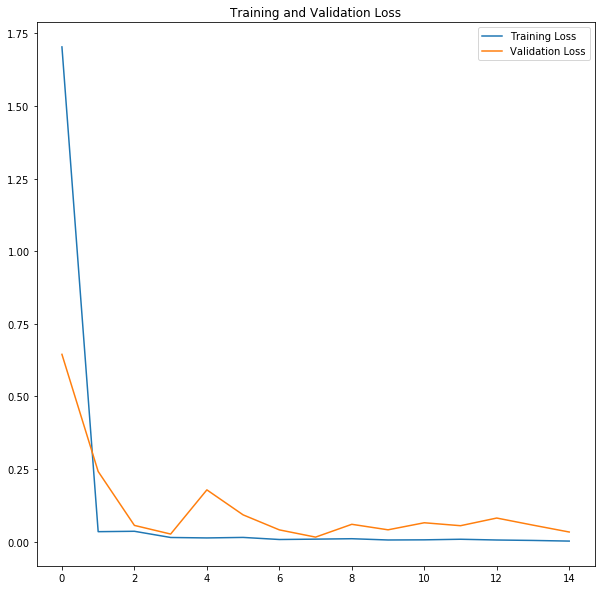

In [22]:
plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()